In [1]:
!pip install squarify

In [7]:
# libraries
from sqlalchemy import create_engine
import datetime as dt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lifetimes import BetaGeoFitter
from lifetimes import GammaGammaFitter
from lifetimes.plotting import plot_period_transactions
from sklearn.preprocessing import MinMaxScaler
import squarify  # treemap
import warnings
warnings.filterwarnings("ignore")

In [10]:
!pip install lifetimes

In [4]:
import pandas as pd

# Load the CSV file into a pandas DataFrame, specifying latin1 encoding
df = pd.read_csv('/content/Year 2010-2011.csv', encoding='latin1')



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
# Display the first 5 rows of the DataFrame
display(df.head())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
df.shape

(541910, 8)

In [15]:
# Display general information about the DataFrame
df.info()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


,0
Invoice,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
Price,0
Customer ID,135080
Country,0


In [16]:
# Creating a function for reading the imported dataset.
def check_df(dataframe):
    print(dataframe.shape)
    print(dataframe.columns)
    print(dataframe.dtypes)
    print(dataframe.head())
    print(dataframe.tail())
    print(dataframe.describe().T)

check_df(df)

(541910, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')
Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer ID    float64
Country         object
dtype: object
  Invoice StockCode                          Description  Quantity  \
0  536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1  536365     71053                  WHITE METAL LANTERN         6   
2  536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3  536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4  536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  Price  Customer ID         Country  
0  12/1/2010 8:26   2.55      17850.0  United Kingdom  
1  12/1/2010 8:26   3.39      17850.0  United Kingdom  
2  12/1/2010 8:26   2.75      17850.0  United Kingdom  
3  12/1

In [19]:

df.dropna(subset=['Customer ID'], inplace=True)
df['Customer ID'] = df['Customer ID'].astype(int)
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.info()
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 397885 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      397885 non-null  object        
 1   StockCode    397885 non-null  object        
 2   Description  397885 non-null  object        
 3   Quantity     397885 non-null  int64         
 4   InvoiceDate  397885 non-null  datetime64[ns]
 5   Price        397885 non-null  float64       
 6   Customer ID  397885 non-null  int64         
 7   Country      397885 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [22]:
# Calculate TotalPrice for each transaction
df['TotalPrice'] = df['Quantity'] * df['Price']

# Get the latest InvoiceDate in the dataset to set a snapshot date
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Group by Customer ID to calculate RFM metrics
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (snapshot_date - date.max()).days, # Recency
    'Invoice': lambda num: num.nunique(),                         # Frequency
    'TotalPrice': lambda TotalPrice: TotalPrice.sum()             # Monetary
})

# Rename columns for clarity
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Display the first few rows of the RFM DataFrame
display(rfm.head())

,Recency,Frequency,Monetary
Customer ID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


In [20]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [25]:
df.dropna(inplace = True)

In [27]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0
TotalPrice,0


In [31]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

replace_with_thresholds(df, "Quantity")
replace_with_thresholds(df, "Price")

In [33]:
# How much sales has been recorded for each product

df_product = df.groupby("Description").agg({"Quantity":"count"})
df_product.reset_index(inplace=True)
df_product

,Description,Quantity
0,4 PURPLE FLOCK DINNER CANDLES,39
1,50'S CHRISTMAS GIFT BAG LARGE,109
2,DOLLY GIRL BEAKER,138
3,I LOVE LONDON MINI BACKPACK,70
4,I LOVE LONDON MINI RUCKSACK,1
...,...,...
3872,ZINC T-LIGHT HOLDER STARS SMALL,238
3873,ZINC TOP 2 DOOR WOODEN SHELF,9
3874,ZINC WILLIE WINKIE CANDLE STICK,192
3875,ZINC WIRE KITCHEN ORGANISER,12


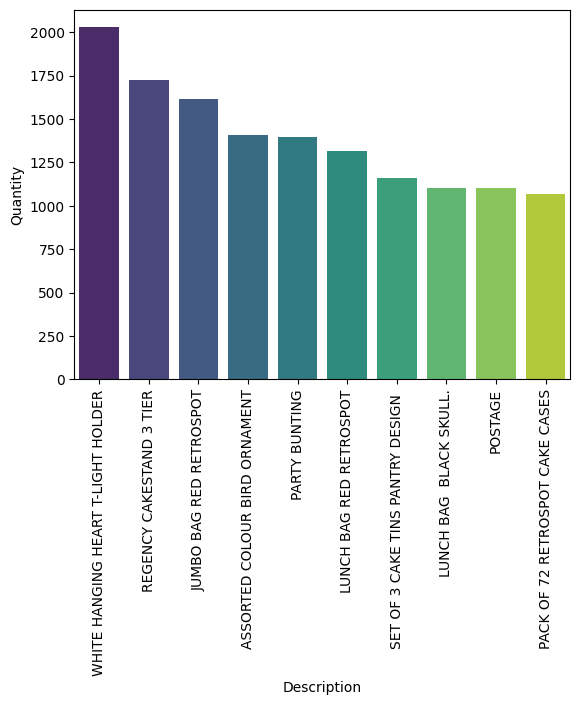

In [37]:
# Plotting top 10 products by quantity

top_pr= df_product.sort_values(by="Quantity",ascending=False).head(10)

sns.barplot(x="Description", y="Quantity", data=top_pr, hue="Description", palette="viridis", legend=False)
plt.xticks(rotation=90)
plt.show()

In [39]:
# total price per invoice
df["TotalPrice"] = df["Price"] * df["Quantity"]

In [41]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [42]:
# About RFM
# The RFM method is a tool for assessing consumer value. It's frequently utilized in database marketing and direct marketing, as well as retail and professional services.
# RFM stands for the three dimensions:
# Recency: How recently did the customer purchase, the difference between today and the customer's last purchase date, in days
# Frequency: How often do they purchase, customer's shopping frequency
# Monetary Value: How much do they spend?

In [44]:
# Determining the analysis date for the recency

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].max()
today_date = dt.datetime(2011, 12, 11)

In [46]:
# Generating RFM metrics

rfm = df.groupby("Customer ID").agg({"InvoiceDate": lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                    "Invoice": lambda Invoice: Invoice.nunique(),
                                    "TotalPrice": lambda TotalPrice: TotalPrice.sum()})

rfm.columns = ["recency","frequency","monetary"]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.00,18.0000,51.0,142.7500,374.000
frequency,4338.0,4.272015,7.697998,1.00,1.0000,2.0,5.0000,209.000
monetary,4338.0,1892.184204,7706.206805,3.75,303.3075,663.1,1631.1075,266163.525


In [47]:
# monetary, the min value of the total money paid can't be 0
# let's remove them from the data

rfm = rfm[rfm["monetary"] > 0]
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,4338.0,93.059474,100.012264,1.00,18.0000,51.0,142.7500,374.000
frequency,4338.0,4.272015,7.697998,1.00,1.0000,2.0,5.0000,209.000
monetary,4338.0,1892.184204,7706.206805,3.75,303.3075,663.1,1631.1075,266163.525


In [48]:
# Generating RFM Score

# recency_score
rfm["recency_score"] = pd.qcut(rfm['recency'], 5, labels=[5, 4, 3, 2, 1])
# frequency_score
rfm["frequency_score"] = pd.qcut(rfm["frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
# monetary_score
rfm["monetary_score"] = pd.qcut(rfm["monetary"], 5, labels=[1, 2, 3, 4, 5])

#  RFM Score
#rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str))
rfm["RFM_SCORE"] = (rfm["recency_score"].astype(str) + rfm["frequency_score"].astype(str) + rfm["monetary_score"].astype(str))
rfm.head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE
Customer ID,,,,,,,
12346,326,1,310.44,1,1,2,112
12347,3,7,4310.00,5,5,5,555
12348,76,4,1770.78,2,4,4,244
12349,19,1,1491.72,4,1,4,414
12350,311,1,331.46,1,1,2,112
12352,37,8,1756.34,3,5,4,354
12353,205,1,89.00,1,1,1,111
12354,233,1,1079.40,1,1,4,114
12355,215,1,459.40,1,1,2,112


In [49]:
import re

seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Lose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}

rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)

# Remove numbers from the 'segment' column using regular expressions
rfm['segment'] = rfm['segment'].apply(lambda x: re.sub(r'\d', '', x))

rfm.head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
12346,326,1,310.44,1,1,2,112,Hibernating
12347,3,7,4310.00,5,5,5,555,Champions
12348,76,4,1770.78,2,4,4,244,At Risk
12349,19,1,1491.72,4,1,4,414,At Risk
12350,311,1,331.46,1,1,2,112,Hibernating
12352,37,8,1756.34,3,5,4,354,Loyal Customers
12353,205,1,89.00,1,1,1,111,Hibernating
12354,233,1,1079.40,1,1,4,114,Hibernating
12355,215,1,459.40,1,1,2,112,Hibernating


In [50]:
# Grouping RFM mean and frequency values according to segments
rfm[["segment", "recency", "frequency", "monetary"]].groupby("segment").agg(["mean", "count"])

recency        frequency           monetary      
                           mean count       mean count         mean count
segment                                                                  
About to Sleep        28.640449   178   2.106742   178   303.960365   178
At Risk              126.726684   772   2.547927   772   914.094554   772
Can't Lose           119.108108    74   7.378378    74  2695.778784    74
Champions              6.114219   429  16.270396   429  8887.130979   429
Hibernating          162.200000  1545   1.099029  1545   350.658076  1545
Loyal Customers       28.827519  1032   5.907946  1032  2551.308145  1032
Need Attention        36.068670   233   2.386266   233   913.709549   233
New Customers         12.000000     1   7.000000     1   198.230000     1
Potential Loyalists    7.690141    71   4.154930    71   675.763239    71
Promising              4.333333     3   3.666667     3   217.946667     3

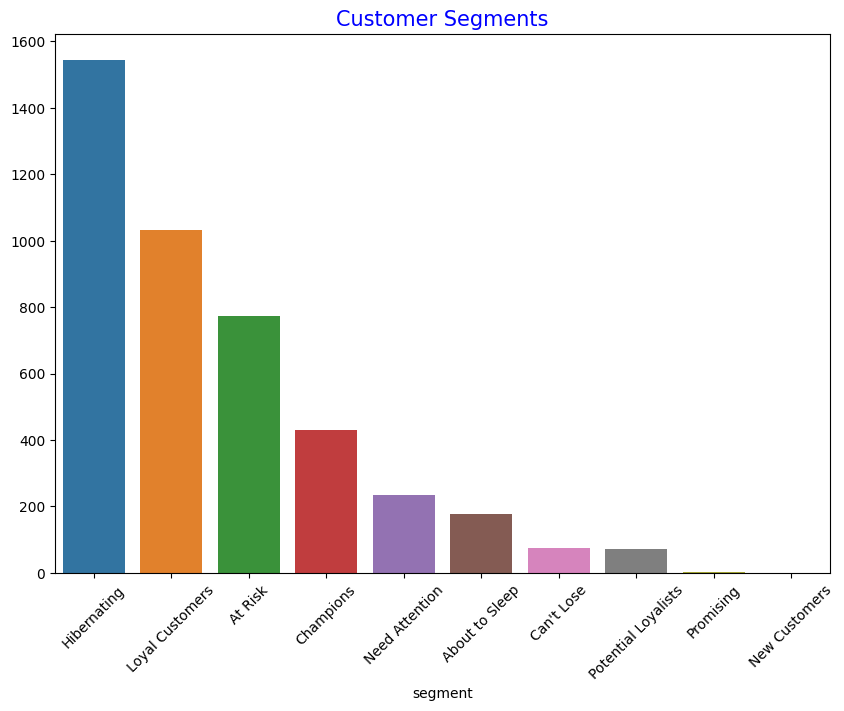

In [53]:
segment= rfm["segment"].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=segment.index,y=segment.values, hue=segment.index, palette="tab10", legend=False)
plt.xticks(rotation=45)
plt.title('Customer Segments',color = 'blue',fontsize=15)
plt.show()

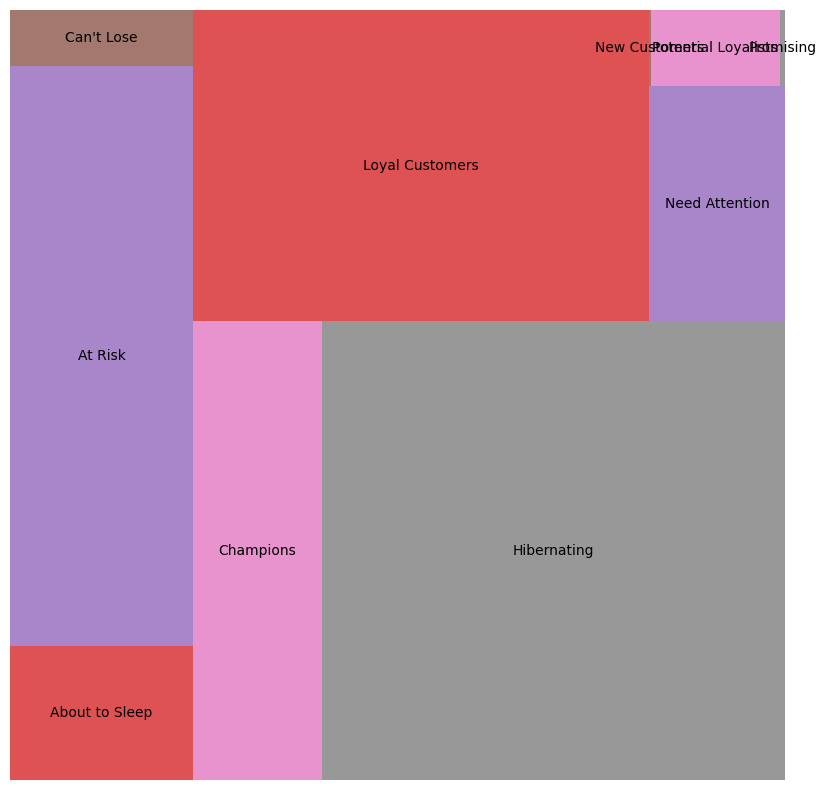

In [55]:
# Prepare data for treemap: count customers per segment
df_treemap = rfm.groupby('segment').size().reset_index(name='RFM_SCORE')

fig, ax = plt.subplots(1, figsize = (10,10))

squarify.plot(sizes=df_treemap['RFM_SCORE'],
              label=df_treemap['segment'],
              alpha=.8,
              color=['tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
             )
plt.axis('off')
plt.show()

In [58]:
# Preparing Data for CLTV

# Determining the analysis date for the recency
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"].max()
today_date = dt.datetime(2011, 12, 11)

In [60]:
cltv_df = df.groupby('Customer ID').agg({'InvoiceDate': [lambda date: (date.max() - date.min()).days,
                                                         lambda date: (today_date - date.min()).days],
                                         'Invoice': lambda num: num.nunique(),
                                         'TotalPrice': lambda TotalPrice: TotalPrice.sum()})


cltv_df.columns = cltv_df.columns.droplevel(0)
cltv_df.columns = ['recency', 'T', 'frequency', 'monetary']
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12346,0,326,1,310.44
12347,365,368,7,4310.00
12348,282,359,4,1770.78
12349,0,19,1,1491.72
12350,0,311,1,331.46


In [61]:
cltv_df["monetary"] = cltv_df["monetary"] / cltv_df["frequency"]

cltv_df = cltv_df[cltv_df["monetary"] > 0]

cltv_df["recency"] = cltv_df["recency"] / 7
cltv_df["T"] = cltv_df["T"] / 7

cltv_df = cltv_df[(cltv_df['frequency'] > 1)]
cltv_df.head()

,recency,T,frequency,monetary
Customer ID,,,,
12347,52.142857,52.571429,7,615.714286
12348,40.285714,51.285714,4,442.695000
12352,37.142857,42.428571,8,219.542500
12356,43.142857,46.571429,3,937.143333
12358,21.285714,21.571429,2,575.210000


In [62]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv_df['frequency'],
        cltv_df['recency'],
        cltv_df['T'])

<lifetimes.BetaGeoFitter: fitted with 2845 subjects, a: 0.12, alpha: 11.41, b: 2.49, r: 2.18>

In [63]:
# 1 week expected purchase
cltv_df["expected_purc_1_week"] = bgf.predict(1,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

cltv_df.sort_values("expected_purc_1_week", ascending=False).head(10)

,recency,T,frequency,monetary,expected_purc_1_week
Customer ID,,,,,
12748,53.142857,53.428571,209,154.930191,3.249532
14911,53.142857,53.428571,201,691.710100,3.126418
17841,53.000000,53.428571,124,330.134355,1.940152
13089,52.285714,52.857143,97,606.362474,1.537420
14606,53.142857,53.428571,93,130.139032,1.463897
15311,53.285714,53.428571,91,667.779121,1.433618
12971,52.571429,53.285714,86,127.485872,1.356931
14646,50.428571,50.714286,73,3646.075685,1.206361
13408,53.000000,53.428571,62,453.500645,0.986184


In [65]:
# 1 month expected purchase
cltv_df["expected_purc_1_month"] = bgf.predict(4,
                                               cltv_df['frequency'],
                                               cltv_df['recency'],
                                               cltv_df['T'])

cltv_df.sort_values("expected_purc_1_month", ascending=False).head(10)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month
Customer ID,,,,,,
12748,53.142857,53.428571,209,154.930191,3.249532,12.963340
14911,53.142857,53.428571,201,691.710100,3.126418,12.472198
17841,53.000000,53.428571,124,330.134355,1.940152,7.739802
13089,52.285714,52.857143,97,606.362474,1.537420,6.133030
14606,53.142857,53.428571,93,130.139032,1.463897,5.839867
15311,53.285714,53.428571,91,667.779121,1.433618,5.719073
12971,52.571429,53.285714,86,127.485872,1.356931,5.413112
14646,50.428571,50.714286,73,3646.075685,1.206361,4.811915
13408,53.000000,53.428571,62,453.500645,0.986184,3.934114


In [66]:
# Using Gamma Gamma Model

ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary'])

<lifetimes.GammaGammaFitter: fitted with 2845 subjects, p: 3.79, q: 0.34, v: 3.73>

In [68]:
cltv_df["expected_average_profit"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                             cltv_df['monetary'])

cltv_df.sort_values("expected_average_profit", ascending=False).head(20)

,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit
Customer ID,,,,,,,
12415,44.714286,48.285714,21,5724.302619,0.379598,1.513895,5772.178171
12590,0.000000,30.285714,2,4591.172500,0.011543,0.045961,5029.419619
12435,26.857143,38.285714,2,3914.945000,0.076317,0.304084,4288.944021
12409,14.714286,26.142857,3,3690.890000,0.117435,0.467409,3918.812814
14088,44.571429,46.142857,13,3864.554615,0.260285,1.037908,3917.129721
18102,52.285714,52.571429,60,3859.739083,0.968542,3.863599,3870.996931
12753,48.428571,51.857143,6,3571.565000,0.126057,0.502762,3678.578346
14646,50.428571,50.714286,73,3646.075685,1.206361,4.811915,3654.814813
15749,13.857143,47.571429,3,3028.780000,0.027983,0.111573,3216.052342


In [69]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=6,
                                   freq="W",
                                   discount_rate=0.01)

In [70]:
# Reset index
cltv = cltv.reset_index()
# Merging the main table and the forecast values table
cltv_final = cltv_df.merge(cltv, on="Customer ID", how="left")
# sorting
cltv_final.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
1122,14646,50.428571,50.714286,73,3646.075685,1.206361,4.811915,3654.814813,108728.315215
2761,18102,52.285714,52.571429,60,3859.739083,0.968542,3.863599,3870.996931,92504.413784
843,14096,13.857143,14.571429,17,3163.588235,0.728683,2.895541,3196.436057,56127.503202
36,12415,44.714286,48.285714,21,5724.302619,0.379598,1.513895,5772.178171,53976.122662
1257,14911,53.142857,53.428571,201,691.710100,3.126418,12.472198,692.326367,53423.413878
2458,17450,51.285714,52.571429,46,2863.274891,0.747427,2.981530,2874.198684,53001.249521
874,14156,51.571429,53.142857,55,2104.026727,0.877495,3.500478,2110.754226,45705.299651
2487,17511,52.857143,53.428571,31,2933.943065,0.508821,2.029759,2950.580133,37045.545939
2075,16684,50.428571,51.285714,28,2209.969107,0.478052,1.906840,2223.884974,26216.382746
650,13694,52.714286,53.428571,50,1275.700500,0.800803,3.194570,1280.218258,25300.028830


In [71]:
# 1 Month CLTV:
cltv_1 = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=1,  # 1 month
                                   freq="W",  # frequency of T
                                   discount_rate=0.01)

cltv_1.head()
cltv_1= cltv_1.reset_index()
cltv_1 = cltv_df.merge(cltv_1, on="Customer ID", how="left")
cltv_1.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
1122,14646,50.428571,50.714286,73,3646.075685,1.206361,4.811915,3654.814813,18908.367393
2761,18102,52.285714,52.571429,60,3859.739083,0.968542,3.863599,3870.996931,16080.114918
843,14096,13.857143,14.571429,17,3163.588235,0.728683,2.895541,3196.436057,9946.896079
36,12415,44.714286,48.285714,21,5724.302619,0.379598,1.513895,5772.178171,9395.039984
1257,14911,53.142857,53.428571,201,691.710100,3.126418,12.472198,692.326367,9283.904650
2458,17450,51.285714,52.571429,46,2863.274891,0.747427,2.981530,2874.198684,9213.613557
874,14156,51.571429,53.142857,55,2104.026727,0.877495,3.500478,2110.754226,7944.019925
2487,17511,52.857143,53.428571,31,2933.943065,0.508821,2.029759,2950.580133,6439.126203
2075,16684,50.428571,51.285714,28,2209.969107,0.478052,1.906840,2223.884974,4559.286804
1754,16000,0.000000,0.428571,3,2335.120000,0.421999,1.663906,2479.804847,4430.944349


In [72]:
# 12 Month CLTV Forecast:

cltv_12 = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency'],
                                   cltv_df['T'],
                                   cltv_df['monetary'],
                                   time=12,
                                   freq="W",
                                   discount_rate=0.01)

cltv_12.head()
cltv_12 = cltv_12.reset_index()
cltv_12 = cltv_df.merge(cltv_12, on="Customer ID", how="left")
cltv_12.sort_values(by="clv", ascending=False).head(10)

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv
1122,14646,50.428571,50.714286,73,3646.075685,1.206361,4.811915,3654.814813,207547.048744
2761,18102,52.285714,52.571429,60,3859.739083,0.968542,3.863599,3870.996931,176638.655024
843,14096,13.857143,14.571429,17,3163.588235,0.728683,2.895541,3196.436057,105747.503386
36,12415,44.714286,48.285714,21,5724.302619,0.379598,1.513895,5772.178171,102959.516704
1257,14911,53.142857,53.428571,201,691.710100,3.126418,12.472198,692.326367,102037.309831
2458,17450,51.285714,52.571429,46,2863.274891,0.747427,2.981530,2874.198684,101203.461633
874,14156,51.571429,53.142857,55,2104.026727,0.877495,3.500478,2110.754226,87283.644539
2487,17511,52.857143,53.428571,31,2933.943065,0.508821,2.029759,2950.580133,70743.749746
2075,16684,50.428571,51.285714,28,2209.969107,0.478052,1.906840,2223.884974,50042.151217
650,13694,52.714286,53.428571,50,1275.700500,0.800803,3.194570,1280.218258,48317.640493


In [73]:
# Normalization 0-1 Range For CLV Values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(cltv_final[["clv"]])
cltv_final["scaled_clv"] = scaler.transform(cltv_final[["clv"]])

cltv_final.sort_values(by="scaled_clv", ascending=False).head()

,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv
1122,14646,50.428571,50.714286,73,3646.075685,1.206361,4.811915,3654.814813,108728.315215,1.000000
2761,18102,52.285714,52.571429,60,3859.739083,0.968542,3.863599,3870.996931,92504.413784,0.850785
843,14096,13.857143,14.571429,17,3163.588235,0.728683,2.895541,3196.436057,56127.503202,0.516218
36,12415,44.714286,48.285714,21,5724.302619,0.379598,1.513895,5772.178171,53976.122662,0.496431
1257,14911,53.142857,53.428571,201,691.710100,3.126418,12.472198,692.326367,53423.413878,0.491348


In [74]:
# Segmentation of Customers
cltv_final["segment"] = pd.qcut(cltv_final["scaled_clv"], 4, labels=["D", "C", "B", "A"])
cltv_final.head()

cltv_final.head()


,Customer ID,recency,T,frequency,monetary,expected_purc_1_week,expected_purc_1_month,expected_average_profit,clv,scaled_clv,segment
0,12347,52.142857,52.571429,7,615.714286,0.141281,0.563508,631.912299,2200.733966,0.020241,A
1,12348,40.285714,51.285714,4,442.695000,0.091965,0.366759,463.745963,1050.374783,0.009661,B
2,12352,37.142857,42.428571,8,219.542500,0.182390,0.727104,224.886768,1007.713712,0.009268,B
3,12356,43.142857,46.571429,3,937.143333,0.086162,0.343520,995.998921,2109.620439,0.019403,A
4,12358,21.285714,21.571429,2,575.210000,0.122256,0.486227,631.902166,1870.544880,0.017204,A


In [75]:
# Examination of Segments
cltv_final.groupby("segment").agg({"count", "mean", "sum"})

Customer ID                           recency                   \
                sum          mean count           sum       mean count   
segment                                                                  
D          11074077  15553.478933   712  15706.142857  22.059189   712   
C          10894987  15323.469761   711  21746.142857  30.585292   711   
B          10910905  15345.857947   711  20974.142857  29.499498   711   
A          10626242  14945.488045   711  22414.428571  31.525216   711   

                    T                  frequency  ... expected_purc_1_month  \
                  sum       mean count       sum  ...                 count   
segment                                           ...                         
D        28775.000000  40.414326   712      2181  ...                   712   
C        27059.714286  38.058670   711      2910  ...                   711   
B        24746.428571  34.805103   711      3856  ...                   711   
A        24596.142857  34.593731   711      8092  ...                   711   

        expected_average_profit                             clv               \
                            sum        mean count           sum         mean   
segment                                                                        
D                 141775.962319  199.123543   712  1.983465e+05   278.576515   
C                 206071.187755  289.832894   711  5.261602e+05   740.028454   
B                 280456.802303  394.454012   711  9.498459e+05  1335.929516   
A                 487609.125858  685.807491   711  3.069625e+06  4317.334924   

              scaled_clv                  
        count        sum      mean count  
segment                                   
D         712   1.824239  0.002562   712  
C         711   4.839220  0.006806   711  
B         711   8.735957  0.012287   711  
A         711  28.232067  0.039708   711  

[4 rows x 30 columns]

In [76]:
# Examination of Segments
cltv_final.groupby("segment").agg({"count", "mean"})

Customer ID          recency                T        frequency  \
                 mean count       mean count       mean count       mean   
segment                                                                    
D        15553.478933   712  22.059189   712  40.414326   712   3.063202   
C        15323.469761   711  30.585292   711  38.058670   711   4.092827   
B        15345.857947   711  29.499498   711  34.805103   711   5.423347   
A        14945.488045   711  31.525216   711  34.593731   711  11.381153   

                 monetary       expected_purc_1_week        \
        count        mean count                 mean count   
segment                                                      
D         712  183.660183   712             0.071177   712   
C         711  271.541021   711             0.120787   711   
B         711  373.926814   711             0.162110   711   
A         711  659.831372   711             0.273571   711   

        expected_purc_1_month       expected_average_profit        \
                         mean count                    mean count   
segment                                                             
D                    0.283466   712              199.123543   712   
C                    0.480983   711              289.832894   711   
B                    0.645159   711              394.454012   711   
A                    1.089139   711              685.807491   711   

                 clv       scaled_clv        
                mean count       mean count  
segment                                      
D         278.576515   712   0.002562   712  
C         740.028454   711   0.006806   711  
B        1335.929516   711   0.012287   711  
A        4317.334924   711   0.039708   711